<a href="https://colab.research.google.com/github/EngrFatimaKhawaja/Cv_project/blob/main/project_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the libraries**

In [2]:
!git clone https://github.com/EngrFatimaKhawaja/Cv_project.git

Cloning into 'Cv_project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
!pip uninstall -y librosa resampy
!pip install librosa resampy



Found existing installation: librosa 0.10.1
Uninstalling librosa-0.10.1:
  Successfully uninstalled librosa-0.10.1
Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Successfully uninstalled resampy-0.4.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 6.6 MB/s eta 0:00:00
  Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa
import os
# Function to extract features from audio files
# Load the dataset
def load_data(test_size=0.2, chunk_duration=1):
    x, y = [], []
    for file in os.listdir('/content/drive/MyDrive/cv_project/samples'):
        # Load audio file
        audio, sample_rate = librosa.load('/content/drive/MyDrive/cv_project/samples/' + file, res_type='kaiser_fast')

        # Calculate number of chunks
        num_chunks = int(np.ceil(len(audio) / (sample_rate * chunk_duration)))

        # Extract features from each chunk
        for i in range(num_chunks):
            start = int(i * sample_rate * chunk_duration)
            end = min(len(audio), int((i + 1) * sample_rate * chunk_duration))
            chunk_audio = audio[start:end]

            # Extract features from audio chunk
            feature = extract_features_from_audio(chunk_audio, sample_rate)
            x.append(feature)

            # Extract class label from the file name
            class_label = file.split('(')[0]  # Assuming the class label is before the first '-'
            y.append(class_label)

    # Encode the labels
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    return train_test_split(np.array(x), y, test_size=test_size, random_state=42)

def extract_features_from_audio(audio, sample_rate, mfcc=True, chroma=True, mel=True):
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40, n_fft=1024).T, axis=0)  # Adjust n_fft
        result = np.hstack((result, mfccs))
    if chroma:
        stft = np.abs(librosa.stft(audio, n_fft=1024))  # Adjust n_fft
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=1024).T, axis=0)  # Adjust n_fft
        result = np.hstack((result, mel))
    return result




from tensorflow.keras import layers, models

from tensorflow.keras.layers import Dropout

def create_model_with_dropout(input_shape, num_classes, dropout_rate=0.5):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))  # Adding dropout layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


# Load and split the dataset
X_train, X_test, y_train, y_test = load_data(test_size=0.2)
# Update input_shape to have 2 dimensions (samples, time_steps)
input_shape = (X_train.shape[1], 1)
num_classes=4
# Create the model with dropout
model_with_dropout = create_model_with_dropout(input_shape=(X_train.shape[1], 1), num_classes=num_classes)

# Compile the model
model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
# Display model summary
model.summary()

# Train the model
model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model_with_dropout.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=70
  warnings.warn(


Epoch 1/50
16/16 [==============================] - 2s 21ms/step - loss: 1.3345 - accuracy: 0.3940 - val_loss: 1.1214 - val_accuracy: 0.4524
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 1.0567 - accuracy: 0.5440 - val_loss: 0.9278 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.8728 - accuracy: 0.6400 - val_loss: 0.8112 - val_accuracy: 0.6429
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.7397 - accuracy: 0.7100 - val_loss: 0.7088 - val_accuracy: 0.6746
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6731 - accuracy: 0.7420 - val_loss: 0.7342 - val_accuracy: 0.6746
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6117 - accuracy: 0.7480 - val_loss: 0.7339 - val_accuracy: 0.7540
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5416 - accuracy: 0.7820 - val_loss: 0.5779 - val_accuracy: 0.7857
Epoch 8/50
16/16 [=

In [ ]:
y_train


array([0, 2, 2, 2, 1, 0, 1, 1, 0, 3, 0, 1, 3, 1, 2, 1, 3, 3, 1, 3, 2, 3,
       2, 1, 3, 2, 1, 0, 3, 2, 1, 3, 2, 0, 3, 2, 2, 0, 1, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 3, 3, 0, 1, 3, 1, 3, 2, 3, 2, 3, 3, 2, 0, 3, 2, 1, 2,
       0, 0, 2, 2, 1, 3, 0, 0, 0, 1, 2, 1, 2, 2, 2, 3, 0, 2, 0, 3, 2, 0,
       3, 1, 1, 3, 3, 0, 0, 2, 3, 3, 3, 2, 3, 0, 2, 3, 2, 1, 1, 1, 0, 0,
       2, 0, 0, 3, 2, 3, 1, 3, 0, 1, 3, 1, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 3, 3, 2, 3, 0, 2, 2, 3, 3, 2,
       3, 2, 1, 3, 3, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 3, 3, 0, 0, 2,
       3, 1, 1, 2, 0, 3, 1, 1, 0, 3, 2, 2, 0, 3, 3, 2, 3, 2, 2, 1, 2, 1,
       1, 2, 1, 0, 1, 1, 3, 1, 2, 0, 2, 3, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1,
       3, 1, 1, 2, 0, 0, 1, 3, 0, 0, 0, 0, 2, 0, 3, 2, 3, 3, 0, 3, 2, 0,
       0, 0, 3, 1, 3, 2, 3, 1, 0, 1, 3, 0, 3, 3, 1, 1, 2, 1, 1, 2, 0, 3,
       3, 0, 3, 1, 2, 2, 2, 0, 0, 2, 0, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 0, 0, 2, 3, 3, 2, 3, 1,

F1 Score: 0.8964118257962624


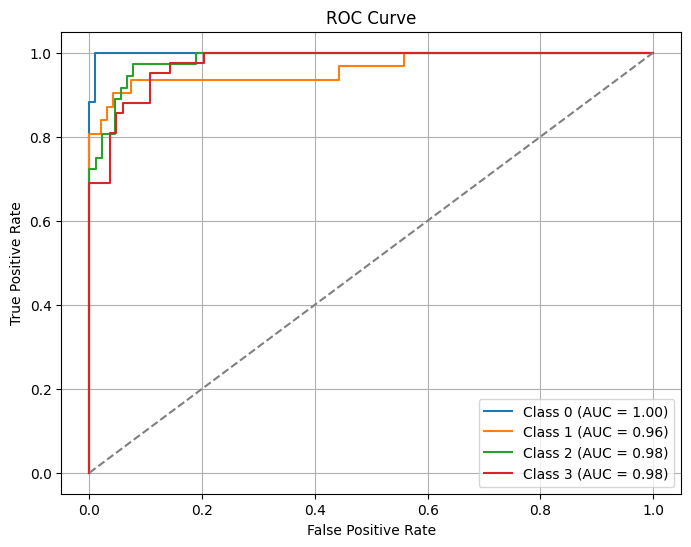

Confusion Matrix:
[[17  0  0  0]
 [ 0 28  2  1]
 [ 0  1 32  3]
 [ 1  3  2 36]]


In [ ]:
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    if np.sum(y_test == i) > 0:  # Check if the class has positive samples
        fpr, tpr, _ = roc_curve(y_test == i, y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


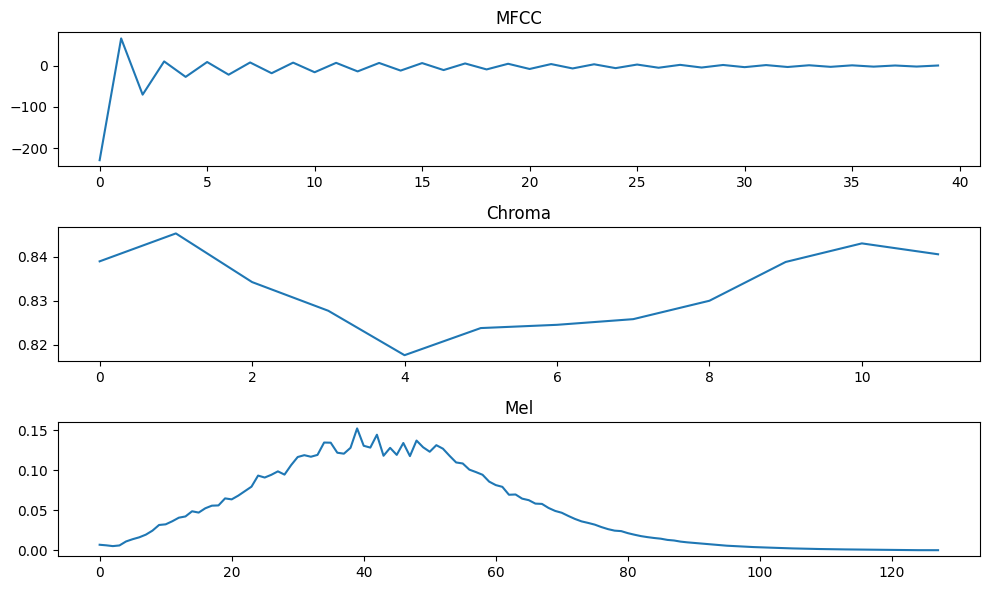

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize features for a single sample
def visualize_features(file_path, mfcc=True, chroma=True, mel=True):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')

    # Extract features from the entire audio
    features = extract_features_from_audio(audio, sample_rate, mfcc=mfcc, chroma=chroma, mel=mel)

    # Plot features
    plt.figure(figsize=(10, 6))
    if mfcc:
        plt.subplot(3, 1, 1)
        plt.title('MFCC')
        plt.plot(features[:40])  # Assuming the first 40 elements correspond to MFCC features
    if chroma:
        plt.subplot(3, 1, 2)
        plt.title('Chroma')
        plt.plot(features[40:52])  # Assuming the next 12 elements correspond to Chroma features
    if mel:
        plt.subplot(3, 1, 3)
        plt.title('Mel')
        plt.plot(features[52:])  # Assuming the rest correspond to Mel features
    plt.tight_layout()
    plt.show()

# Replace 'file_path' with the path to the audio file you want to visualize
file_path = '/content/drive/MyDrive/cv_project/samples/Arcing (1).wav'
visualize_features(file_path)
